# EDA

Here I will explore relationships between the different features in my data.

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

# system import to access file on different directory 
import sys
sys.path.append("/Users/migashane/CodeUp/Data_Science/telco_churn_classification_project/util_")
import prepare_

# set a default them for all my visuals
sns.set_theme(style="whitegrid")


**Get data**

In [2]:
# Get telco data
telco = prepare_.clean_telco_without_dummies()

telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


**Split the data**

In [3]:
# split data into train, validate and test
train, validate, test = prepare_.split_data_(df=telco,
                     test_size=0.2, 
                     validate_size=0.2,
                    stratify_col="churn",
                    random_state=95)

# look at the different splits
train.shape, validate.shape, test.shape

((4225, 20), (1409, 20), (1409, 20))

## Univariate Statistics

In [4]:
# separeate discrete from continuous variables
continuous_col = []
categorical_col = []

for col in train.columns:
    if train[col].dtype == "O":
        categorical_col.append(col)

    else:
        if len(train[col].unique()) < 5: #making anything with less than 4 unique values a catergorical value
            categorical_col.append(col)
        else:
            continuous_col.append(col)
            

**Continuous variables**

Here I will use hitograms, and kernel density plot to my continious variables with added discriptive statistics to help me identify

- The shape of my distributon, peaks and modes, outliets and imbalance in my data. 

TENURE
count    4225.000000
mean       32.589112
std        24.465153
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


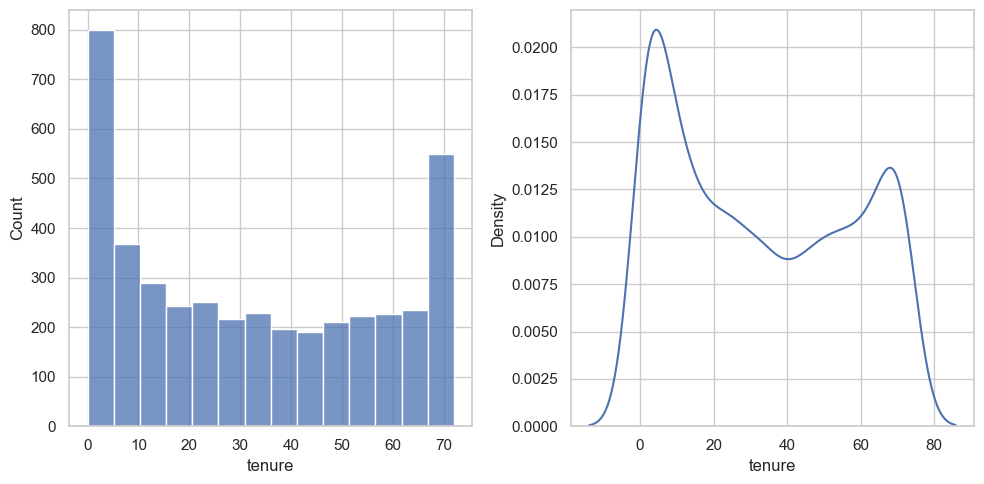

MONTHLY_CHARGES
count    4225.000000
mean       64.621456
std        30.044085
min        18.250000
25%        35.450000
50%        70.250000
75%        89.750000
max       118.750000
Name: monthly_charges, dtype: float64


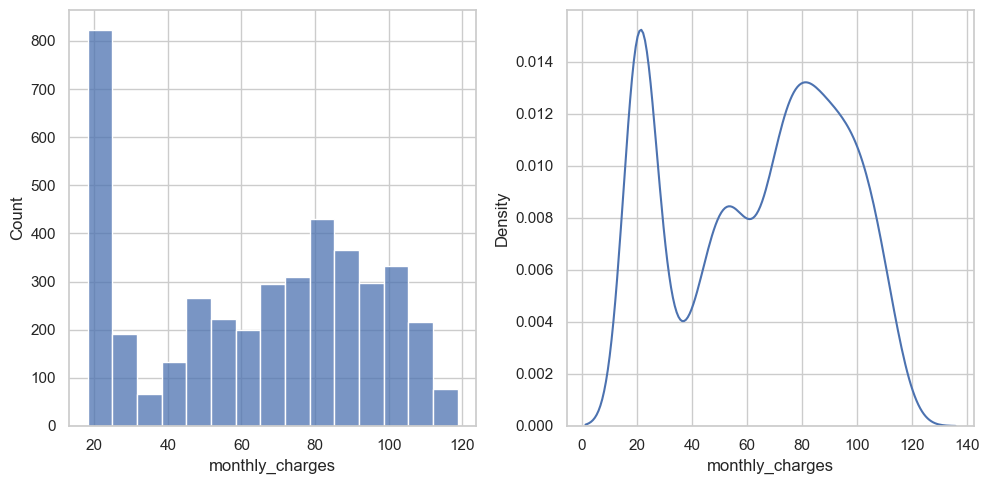

TOTAL_CHARGES
count    4225.000000
mean     2292.584538
std      2268.572655
min        18.800000
25%       412.100000
50%      1402.250000
75%      3804.400000
max      8672.450000
Name: total_charges, dtype: float64


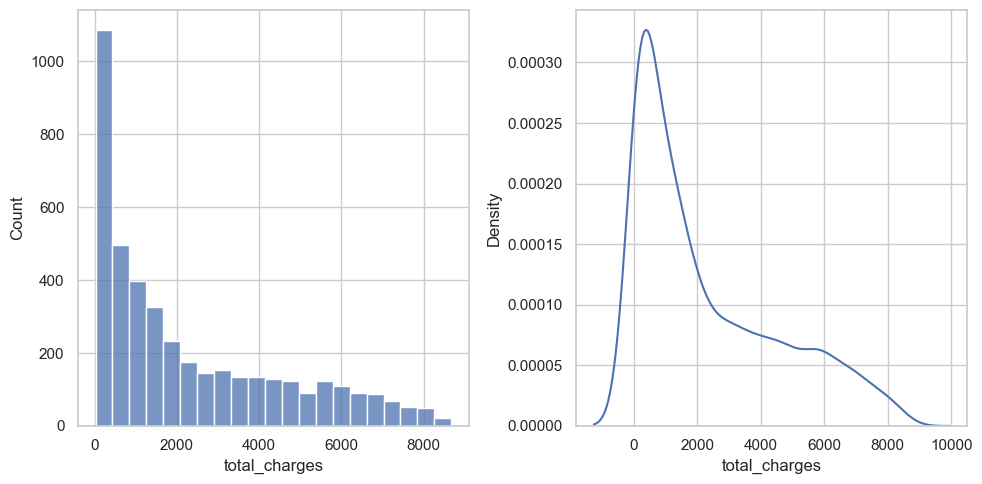

In [5]:
# create visuals for each continuous varable
for ele in continuous_col:
    print(ele.upper())
    print(train[ele].describe())
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    # first plot
    sns.histplot(train[ele], ax=ax[0])
    
    # second plot
    sns.kdeplot(train[ele], ax=ax[1])
    
    plt.tight_layout()
    plt.show()

**Take away**

- `tenure` has two peaks showing that we have two distinct groups. 
- `monthly_charnges` looks to have a bimodal distribution, and it also a has twor major peack and one small peak showing the different clusters in the data.
- `total_charges` looks to have positive skew with one peak showing a major focus group.

**Categorical variables**

Here I will use friquency tables, and and bar plots to explore my categorical variables with added discriptive statistics to help me find relationships between variables. 

GENDER
count     4225
unique       2
top       Male
freq      2153
Name: gender, dtype: object


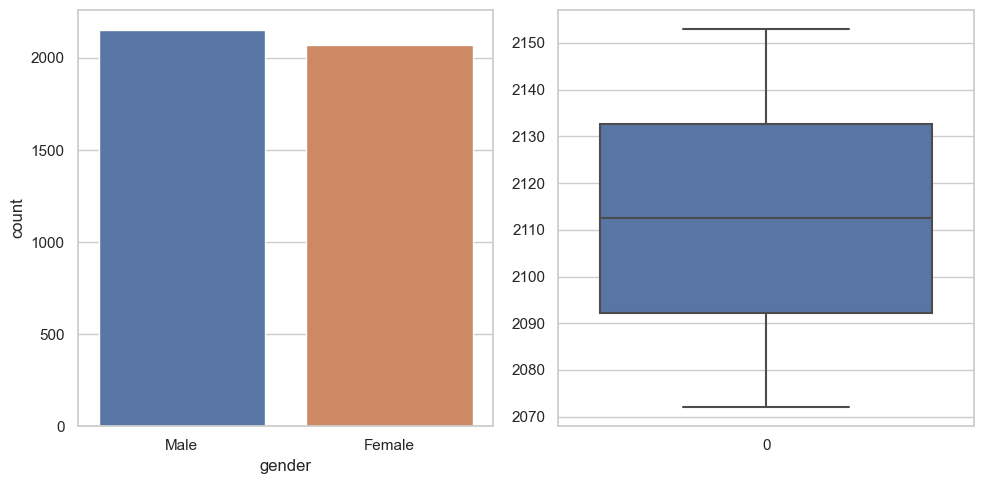

SENIOR_CITIZEN
count    4225.000000
mean        0.159763
std         0.366430
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64


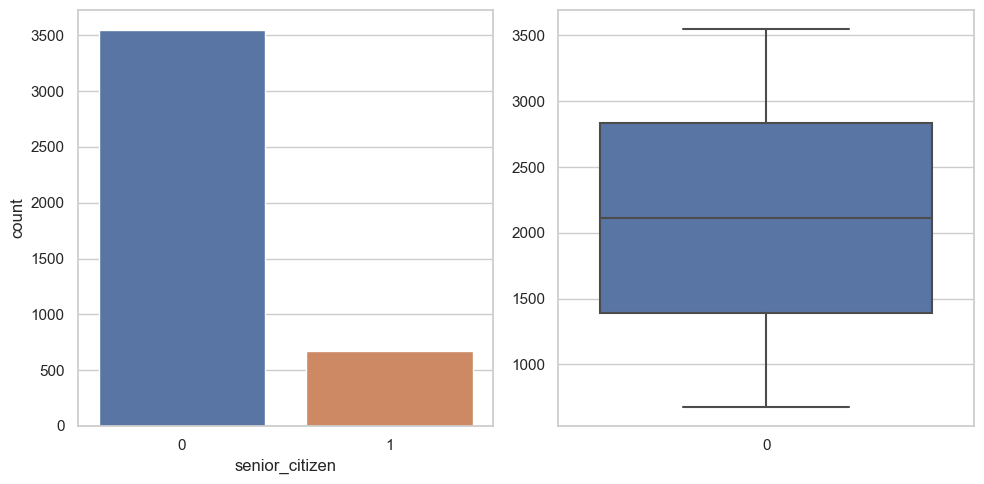

PARTNER
count     4225
unique       2
top         No
freq      2142
Name: partner, dtype: object


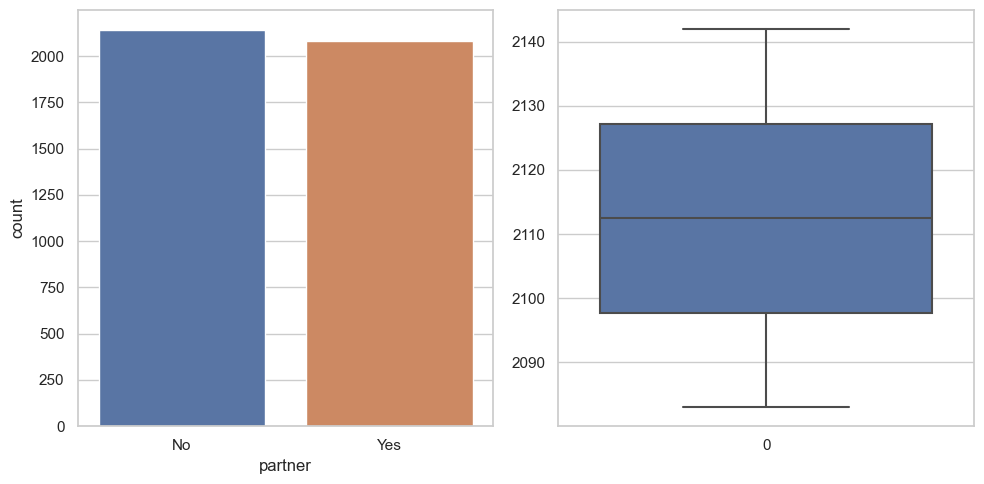

DEPENDENTS
count     4225
unique       2
top         No
freq      2926
Name: dependents, dtype: object


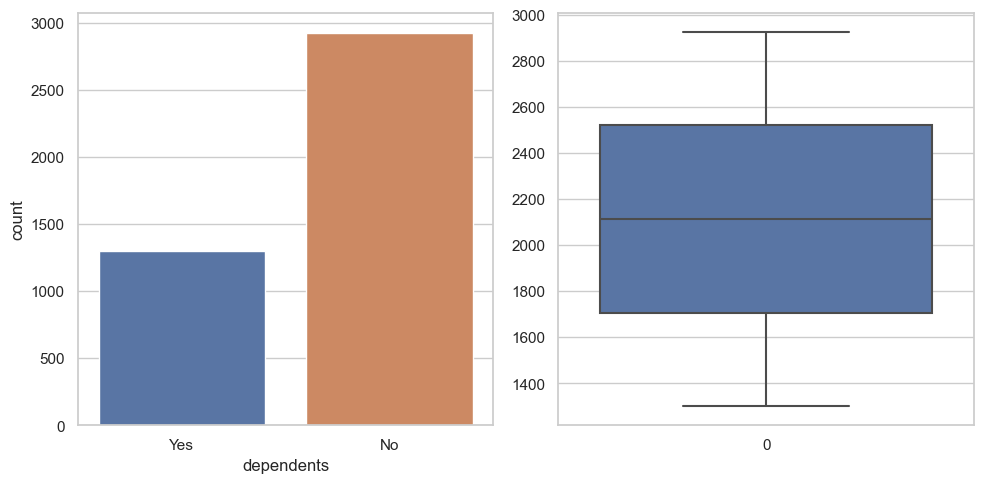

PHONE_SERVICE
count     4225
unique       2
top        Yes
freq      3804
Name: phone_service, dtype: object


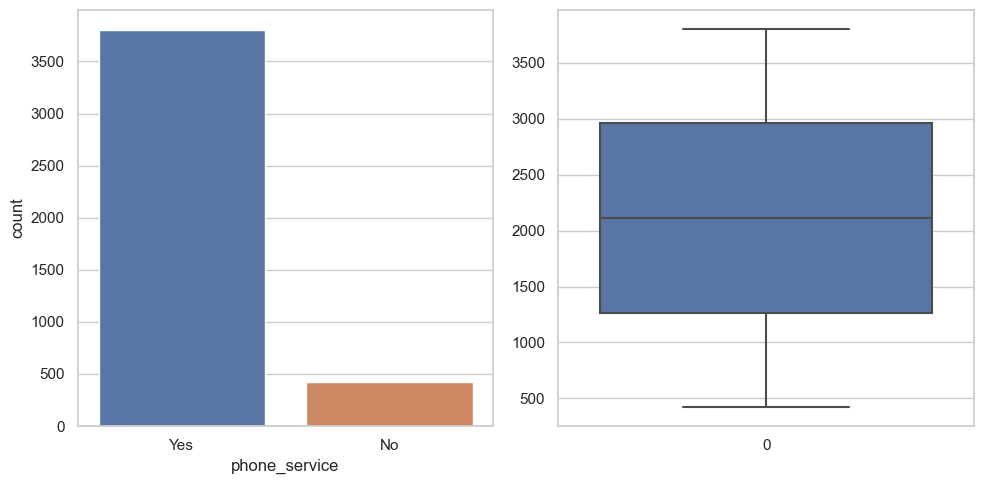

MULTIPLE_LINES
count     4225
unique       3
top         No
freq      2029
Name: multiple_lines, dtype: object


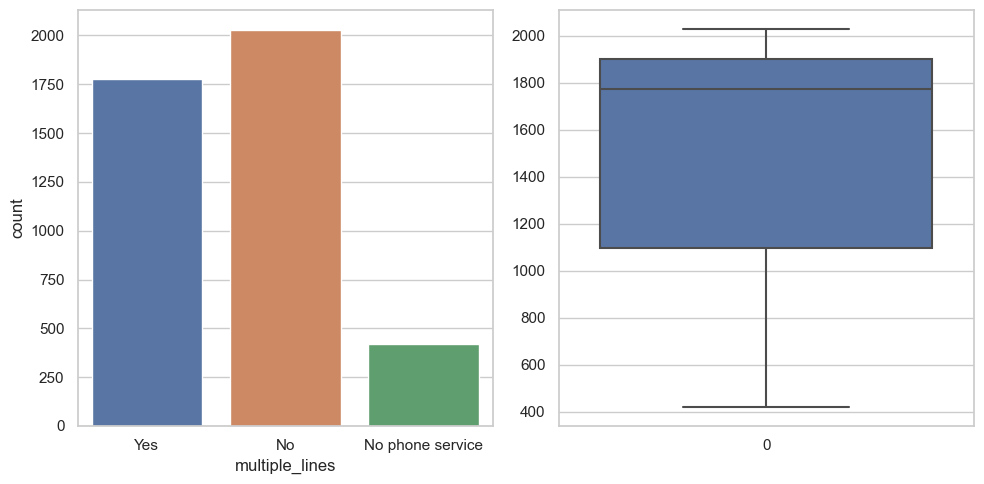

ONLINE_SECURITY
count     4225
unique       3
top         No
freq      2062
Name: online_security, dtype: object


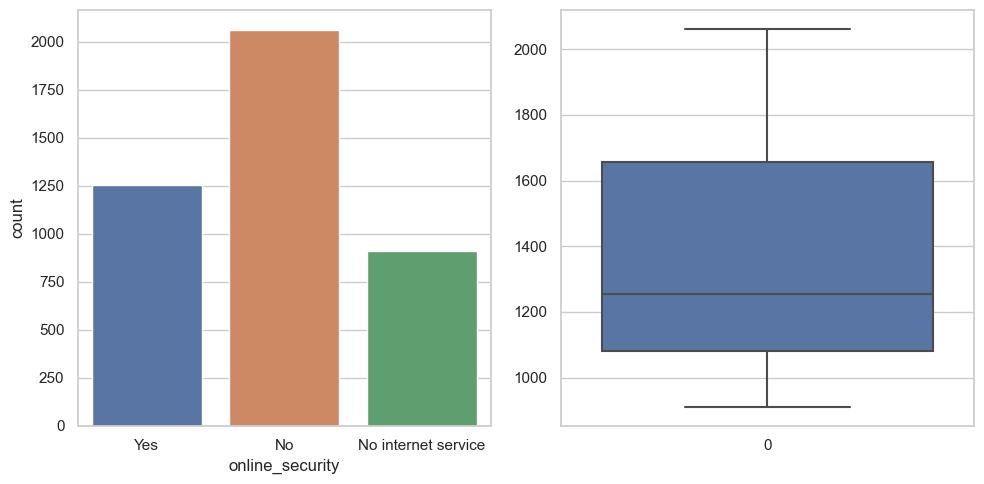

ONLINE_BACKUP
count     4225
unique       3
top         No
freq      1868
Name: online_backup, dtype: object


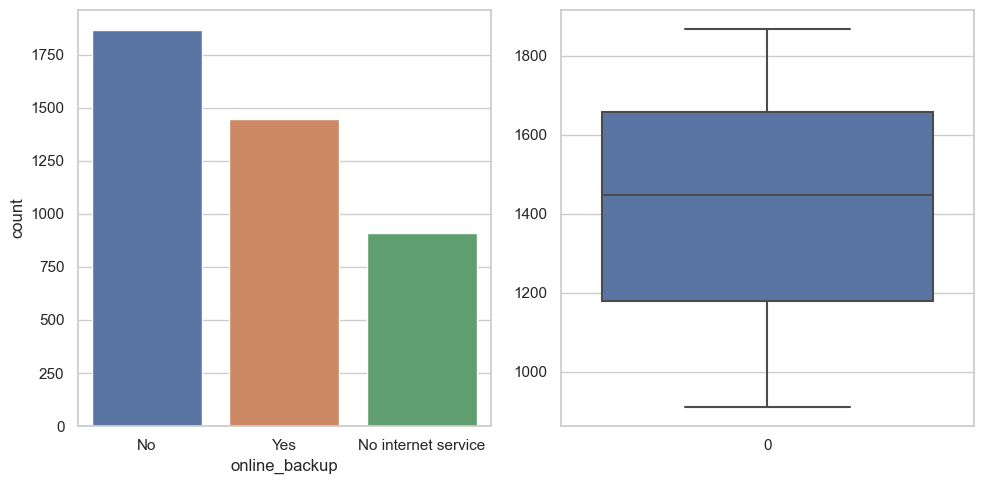

DEVICE_PROTECTION
count     4225
unique       3
top         No
freq      1861
Name: device_protection, dtype: object


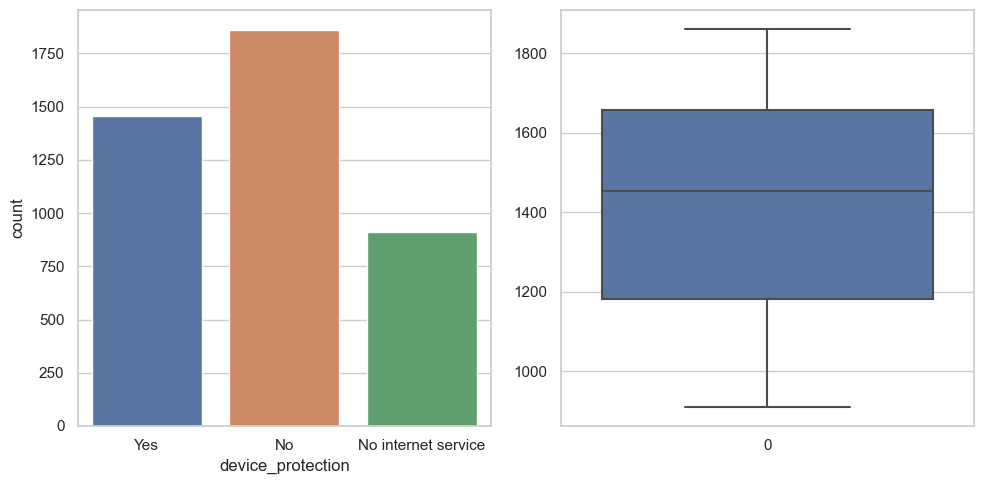

TECH_SUPPORT
count     4225
unique       3
top         No
freq      2084
Name: tech_support, dtype: object


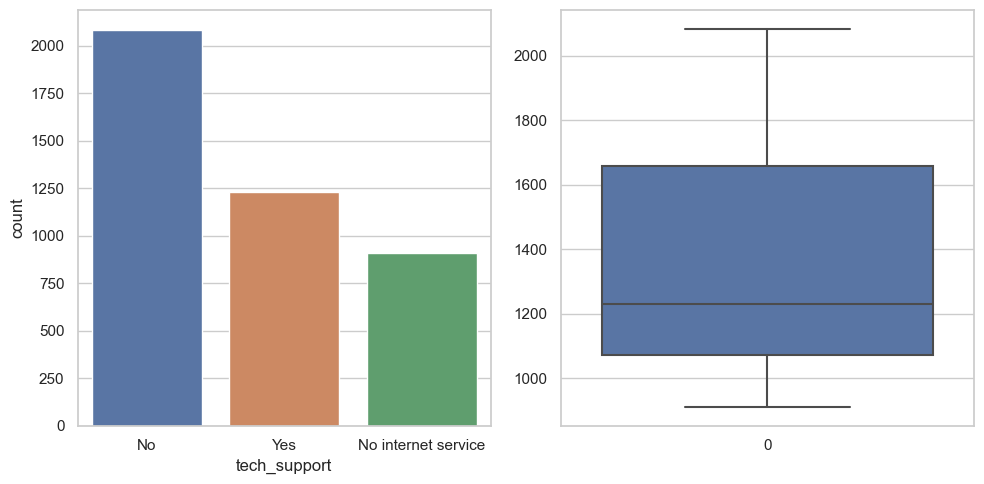

STREAMING_TV
count     4225
unique       3
top         No
freq      1703
Name: streaming_tv, dtype: object


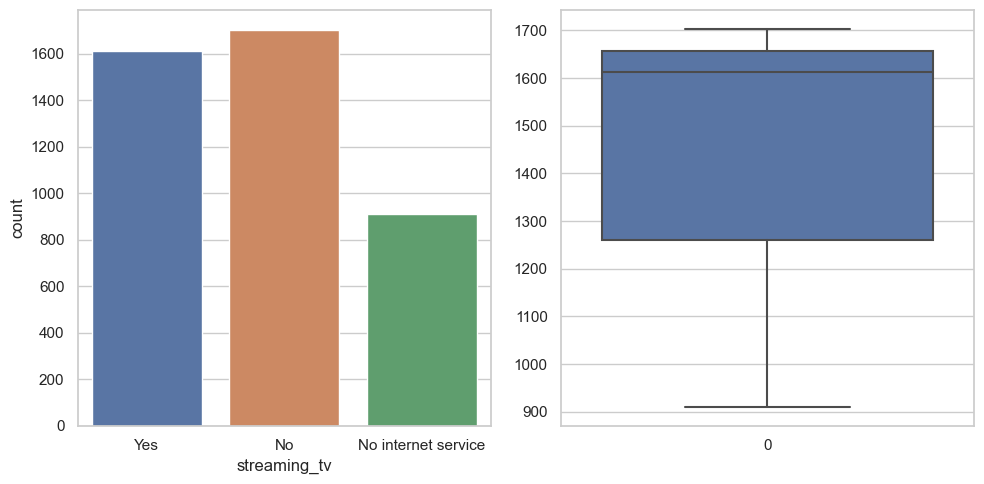

STREAMING_MOVIES
count     4225
unique       3
top         No
freq      1711
Name: streaming_movies, dtype: object


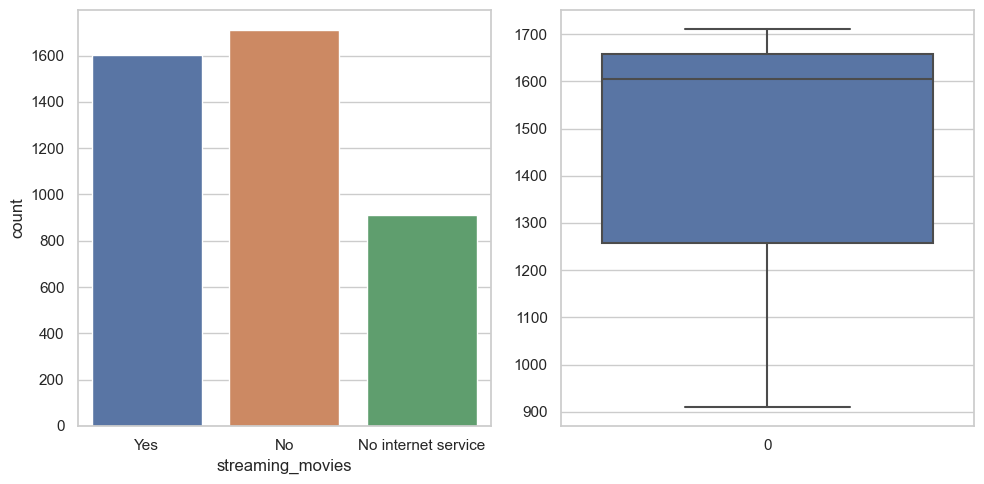

PAPERLESS_BILLING
count     4225
unique       2
top        Yes
freq      2493
Name: paperless_billing, dtype: object


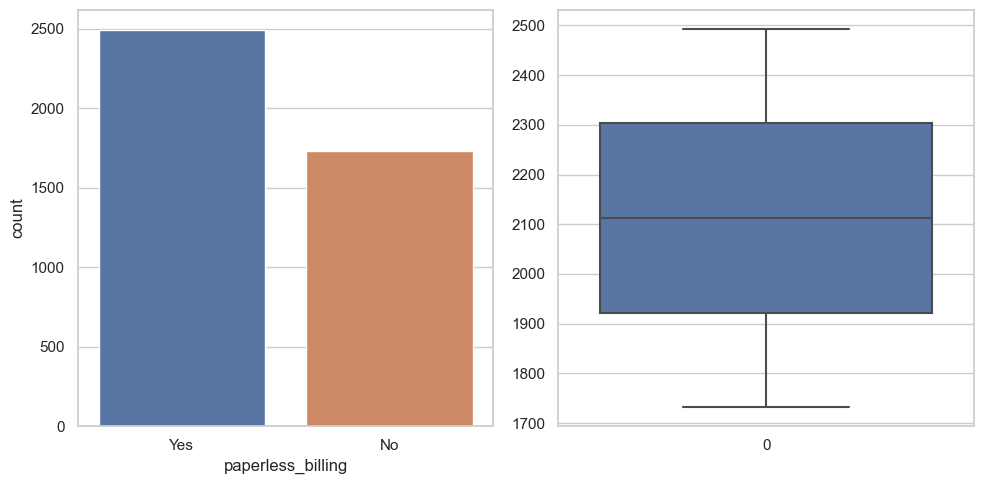

CHURN
count     4225
unique       2
top         No
freq      3104
Name: churn, dtype: object


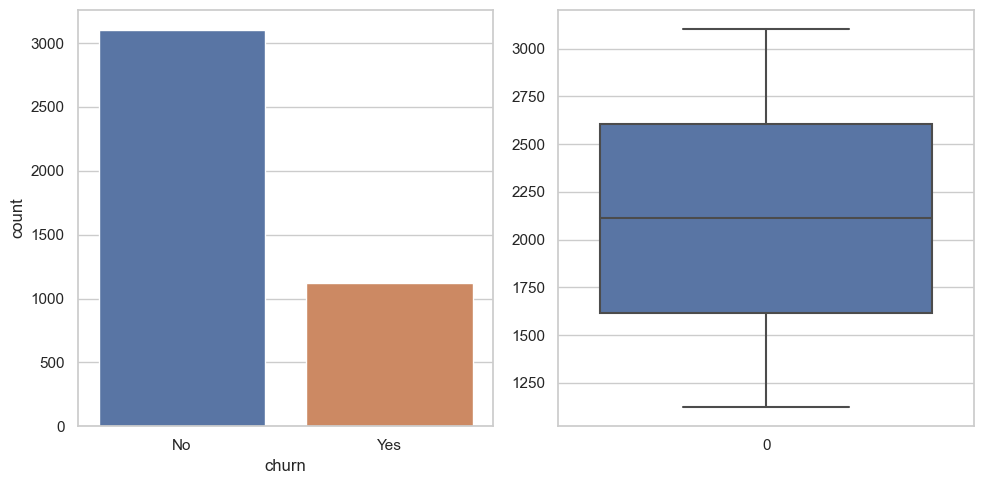

CONTRACT_TYPE
count               4225
unique                 3
top       Month-to-month
freq                2327
Name: contract_type, dtype: object


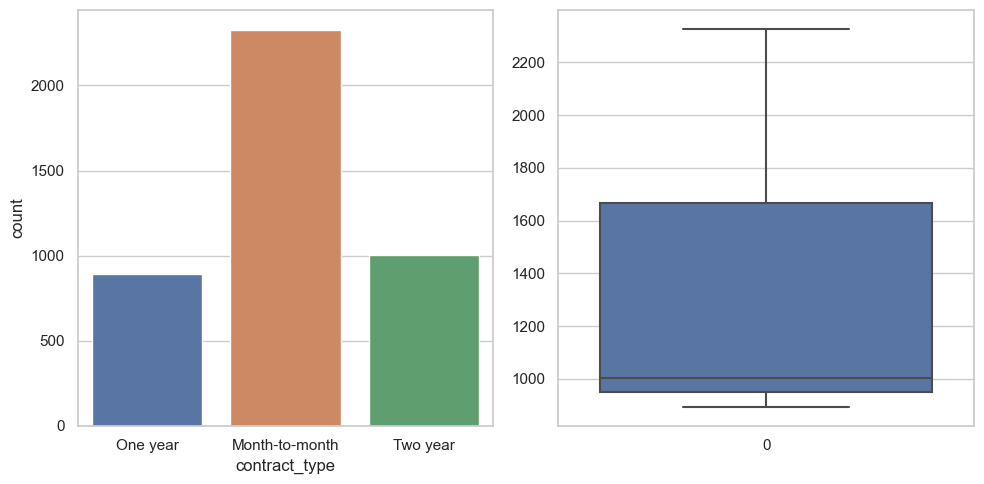

INTERNET_SERVICE_TYPE
count            4225
unique              3
top       Fiber optic
freq             1849
Name: internet_service_type, dtype: object


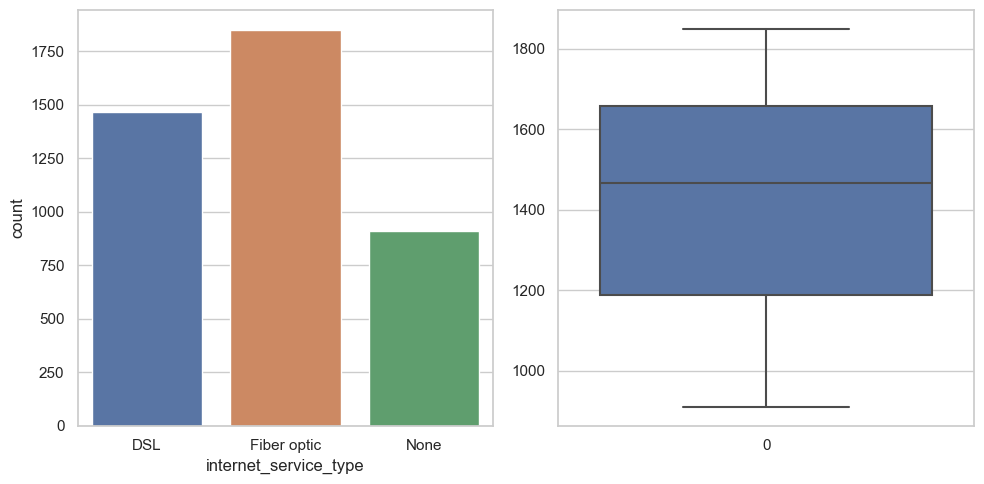

PAYMENT_TYPE
count                 4225
unique                   4
top       Electronic check
freq                  1413
Name: payment_type, dtype: object


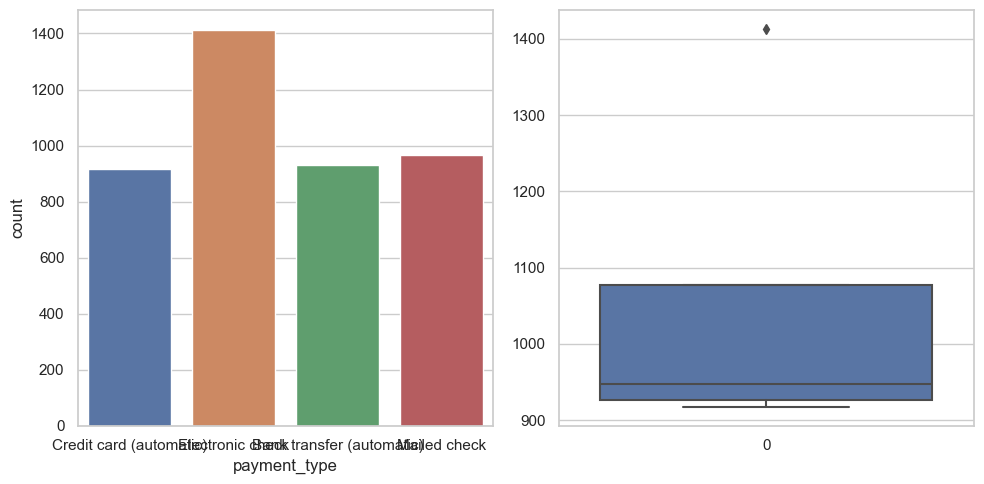

In [6]:
# create visuals for each continuous varable
for ele in categorical_col:
    print(ele.upper())
    print(train[ele].describe())
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    # first plot
    sns.countplot(data=train, x = ele, ax=ax[0])
    
    # secondplot
    sns.boxplot(train[ele].value_counts(), ax=ax[1])
    
    plt.tight_layout()
    plt.show()

- `gender` looks to have about the same count in it's two unique values and the interquartile range is evenly divided in two.
- `senior_cityzen` lots of observations are not senior citizensm, this shifts the mean more towards non senior citizens, but the boxplot still shows 50% of the data eqauly split in two.
- `partner` looks to have about the same count in it's two unique values and the interquartile range is evenly divided in two.
- `dependents` looks to have lots of observations don't have dependents, and the boxplot still shows 50% of the data eqauly split in two.
- `phone_service` has the majority of observations using phone service, and the boxplot still shows 50% of the data eqauly split in two.
- `multiple_lines` looks to have a high count on no multiple lines with three unique categories and a median that is being pulled over by the no-multiple lines gategory.
- `contract_type` looks to have a high count on no month-to-month contract with three unique categories and a median that is being pulled down by the month-to-month gategory.
- `payment_type` looks to have a high count on no electronic check with four unique categories. the other three categoris have about the smae counts, and a median that is being pulled down by the electronic check gategory, and we have some outliers.

## Bivariate statistics

Here I will visualize each feature (y-axis) with my targe variable churn (x-axis) using boxplot violineplot, barplot and stripplot to full see the how each feature relate with my target variable.

**Get combinations of feature with target**

In [7]:
# get combination of all columns paired with the target column
columns = train.columns
target = "churn"
combinations = []
for element in columns:
    if element == "churn":
        pass
    else:
        combinations.append((target, element))

    
print("Number of combinations:", len(combinations))
combinations

Number of combinations: 19


[('churn', 'gender'),
 ('churn', 'senior_citizen'),
 ('churn', 'partner'),
 ('churn', 'dependents'),
 ('churn', 'tenure'),
 ('churn', 'phone_service'),
 ('churn', 'multiple_lines'),
 ('churn', 'online_security'),
 ('churn', 'online_backup'),
 ('churn', 'device_protection'),
 ('churn', 'tech_support'),
 ('churn', 'streaming_tv'),
 ('churn', 'streaming_movies'),
 ('churn', 'paperless_billing'),
 ('churn', 'monthly_charges'),
 ('churn', 'total_charges'),
 ('churn', 'contract_type'),
 ('churn', 'internet_service_type'),
 ('churn', 'payment_type')]

In [8]:
# create a dummy for churn
train["churn"]= pd.get_dummies(train.churn, drop_first=True)

CHURN vs GENDER
count     4225
unique       2
top       Male
freq      2153
Name: gender, dtype: object


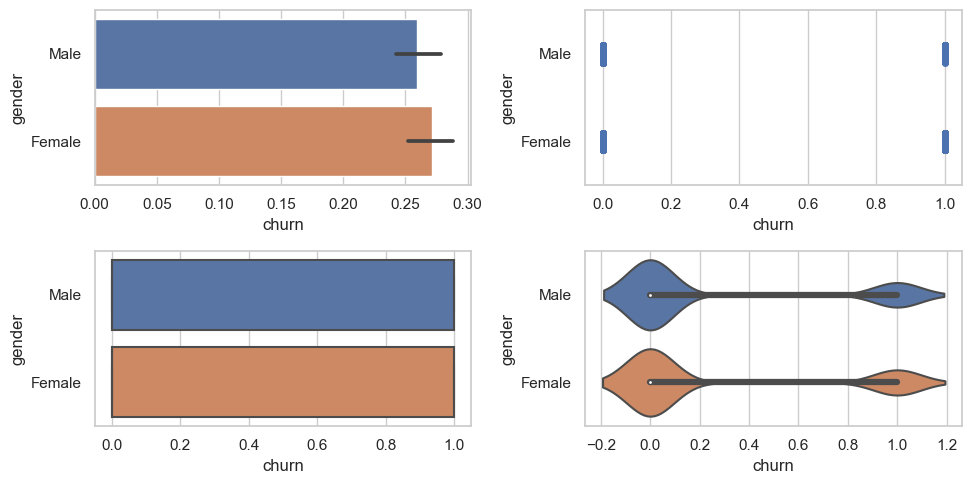

CHURN vs SENIOR_CITIZEN
count    4225.000000
mean        0.159763
std         0.366430
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64


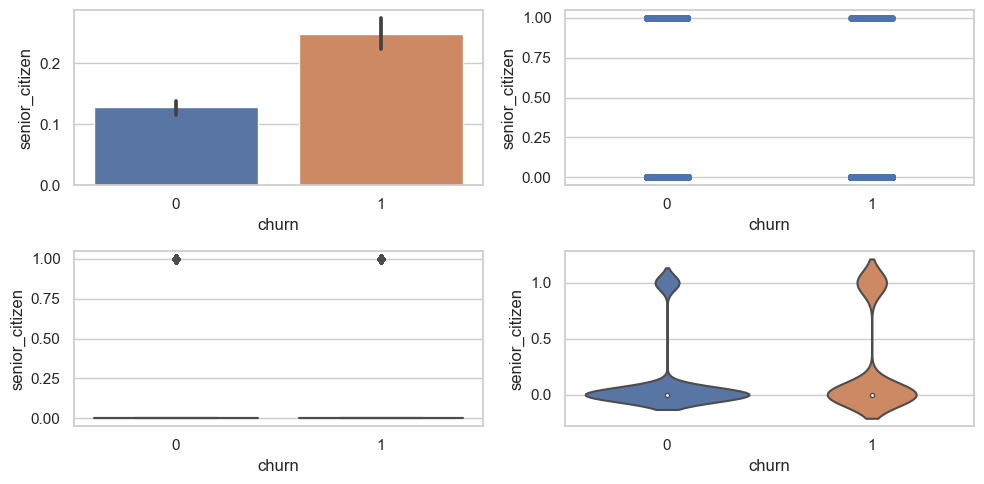

CHURN vs PARTNER
count     4225
unique       2
top         No
freq      2142
Name: partner, dtype: object


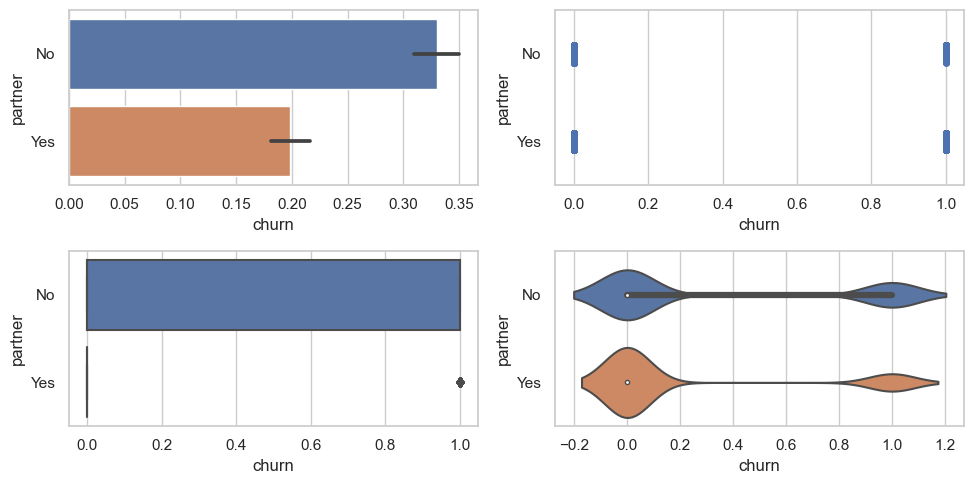

CHURN vs DEPENDENTS
count     4225
unique       2
top         No
freq      2926
Name: dependents, dtype: object


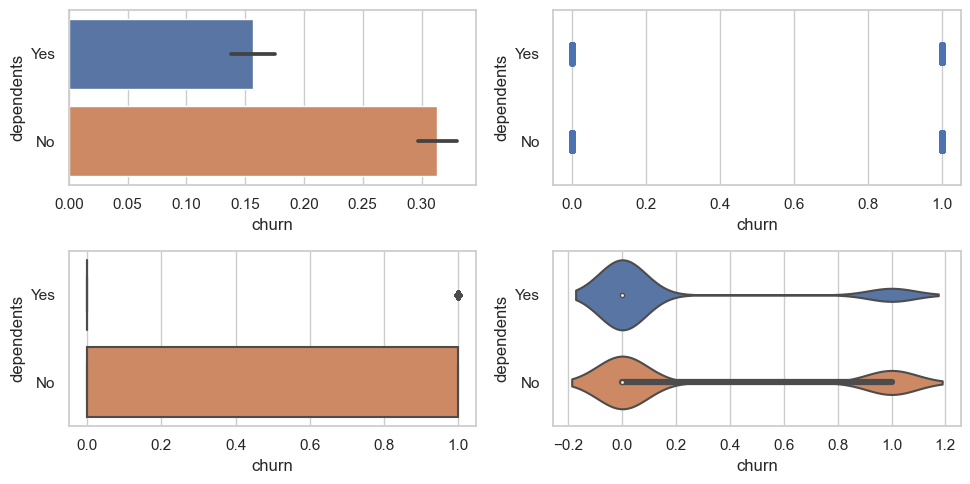

CHURN vs TENURE
count    4225.000000
mean       32.589112
std        24.465153
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


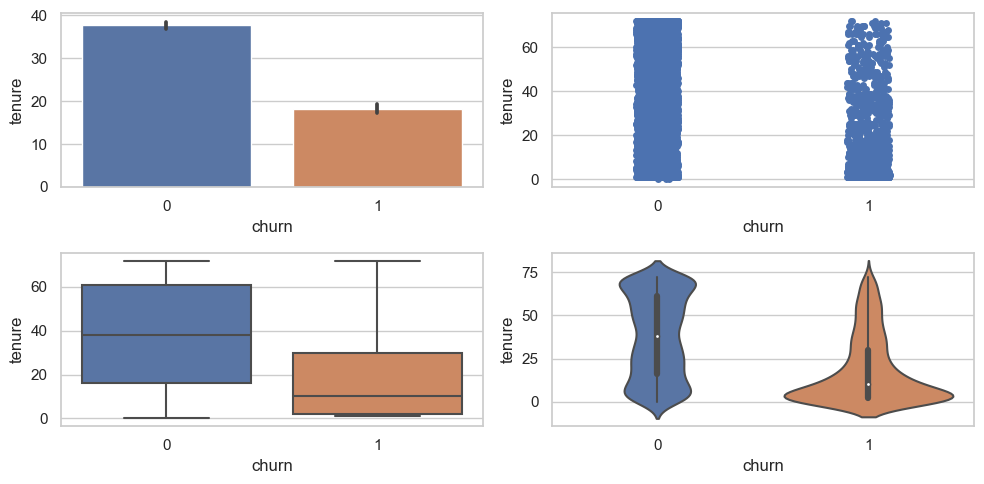

CHURN vs PHONE_SERVICE
count     4225
unique       2
top        Yes
freq      3804
Name: phone_service, dtype: object


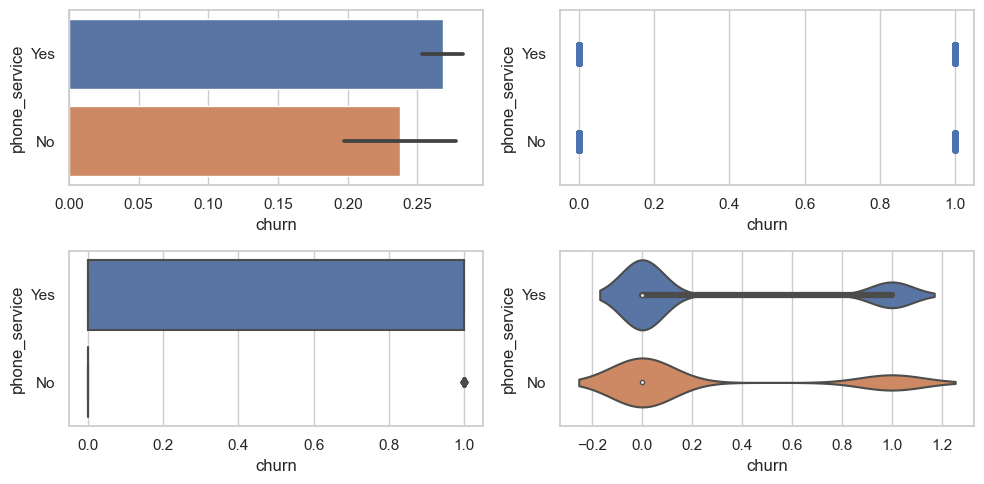

CHURN vs MULTIPLE_LINES
count     4225
unique       3
top         No
freq      2029
Name: multiple_lines, dtype: object


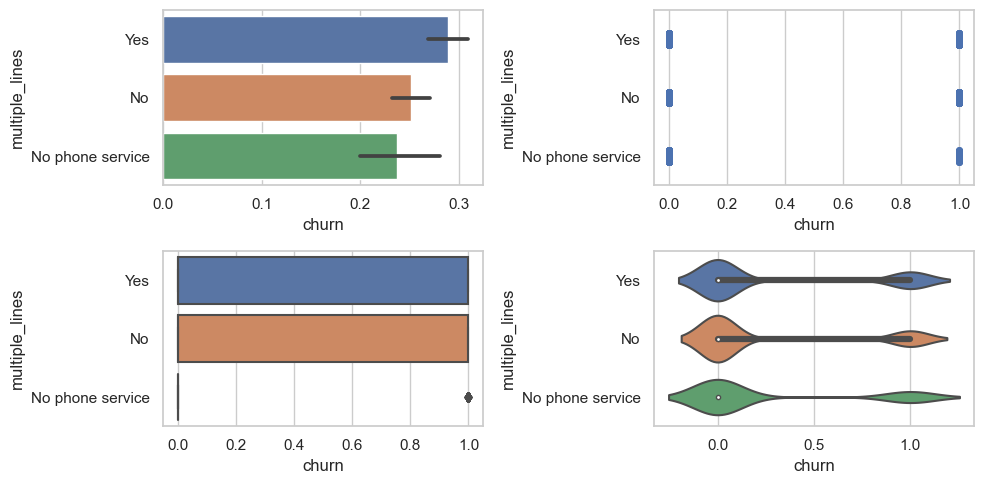

CHURN vs ONLINE_SECURITY
count     4225
unique       3
top         No
freq      2062
Name: online_security, dtype: object


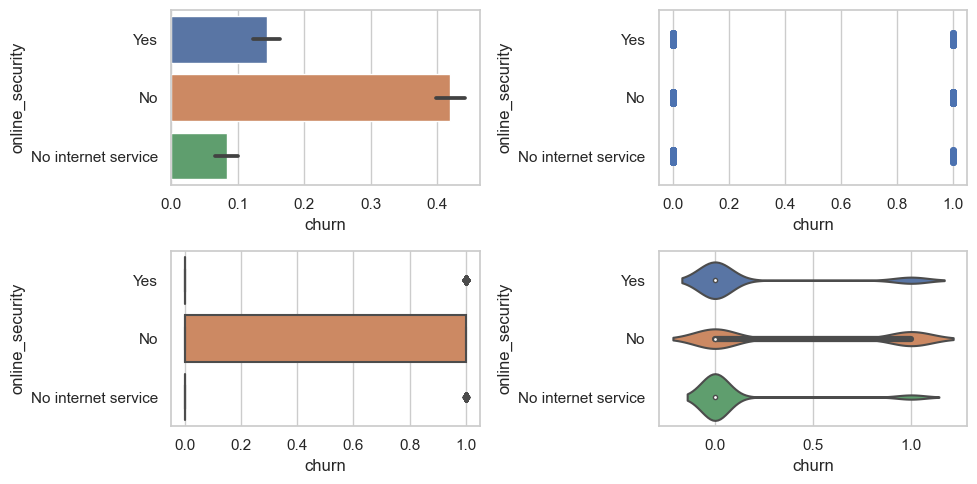

CHURN vs ONLINE_BACKUP
count     4225
unique       3
top         No
freq      1868
Name: online_backup, dtype: object


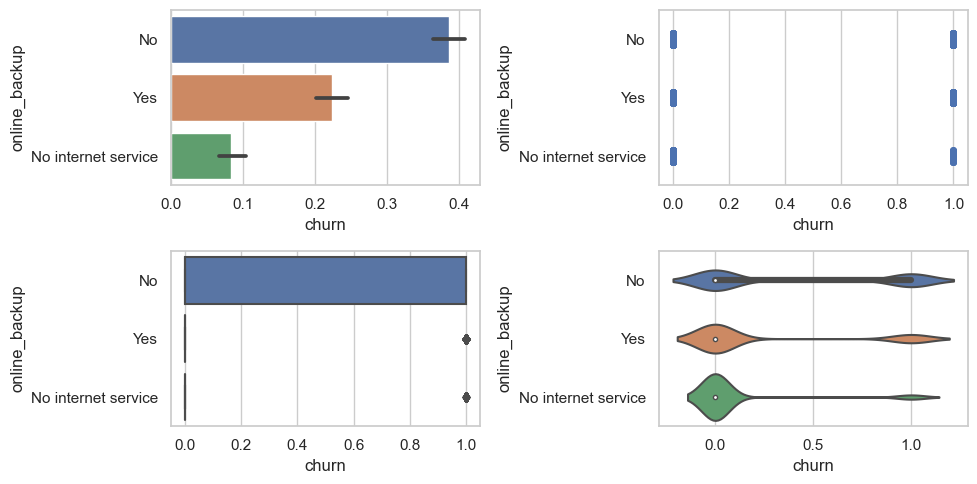

CHURN vs DEVICE_PROTECTION
count     4225
unique       3
top         No
freq      1861
Name: device_protection, dtype: object


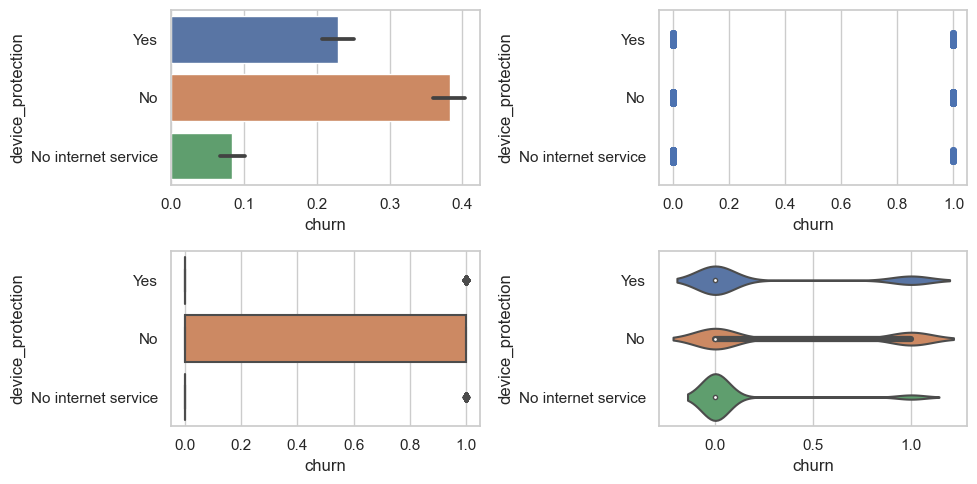

CHURN vs TECH_SUPPORT
count     4225
unique       3
top         No
freq      2084
Name: tech_support, dtype: object


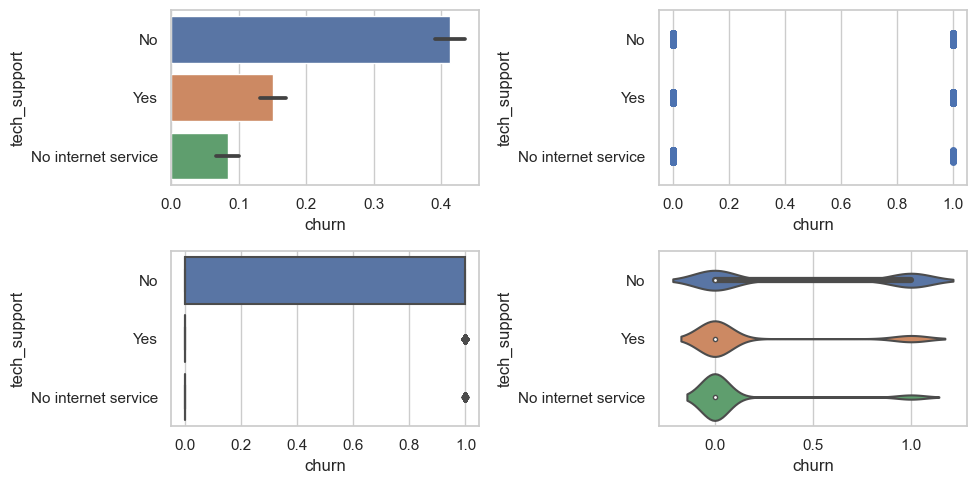

CHURN vs STREAMING_TV
count     4225
unique       3
top         No
freq      1703
Name: streaming_tv, dtype: object


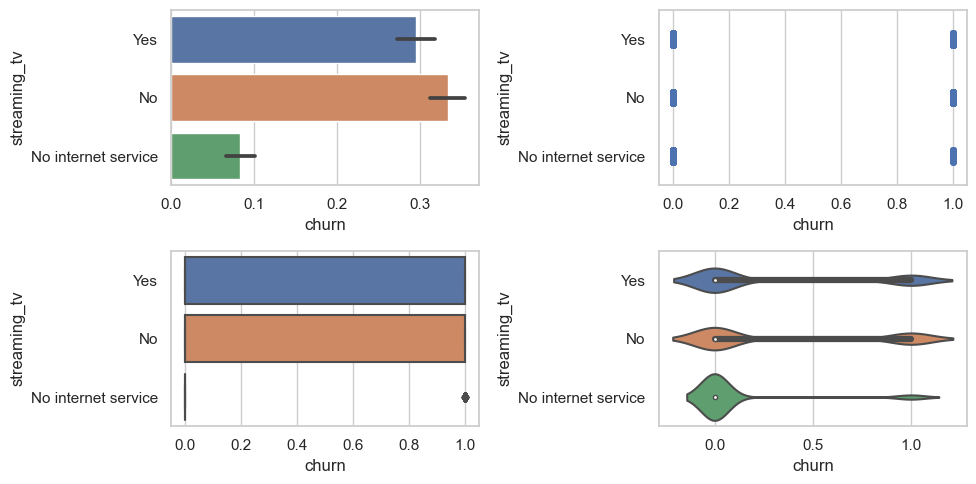

CHURN vs STREAMING_MOVIES
count     4225
unique       3
top         No
freq      1711
Name: streaming_movies, dtype: object


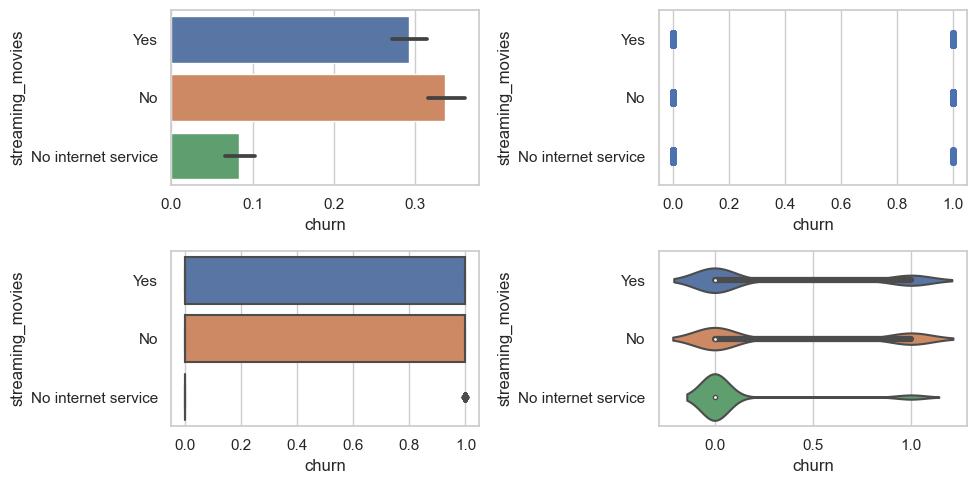

CHURN vs PAPERLESS_BILLING
count     4225
unique       2
top        Yes
freq      2493
Name: paperless_billing, dtype: object


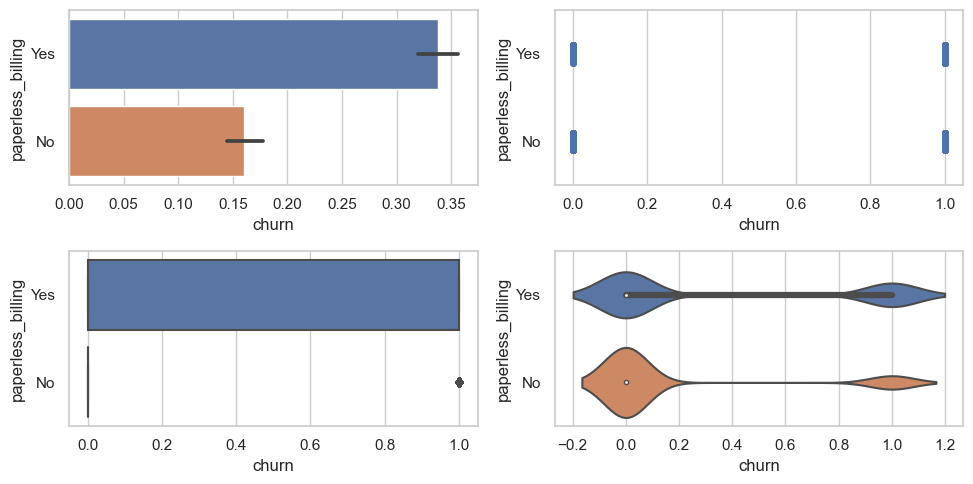

CHURN vs MONTHLY_CHARGES
count    4225.000000
mean       64.621456
std        30.044085
min        18.250000
25%        35.450000
50%        70.250000
75%        89.750000
max       118.750000
Name: monthly_charges, dtype: float64


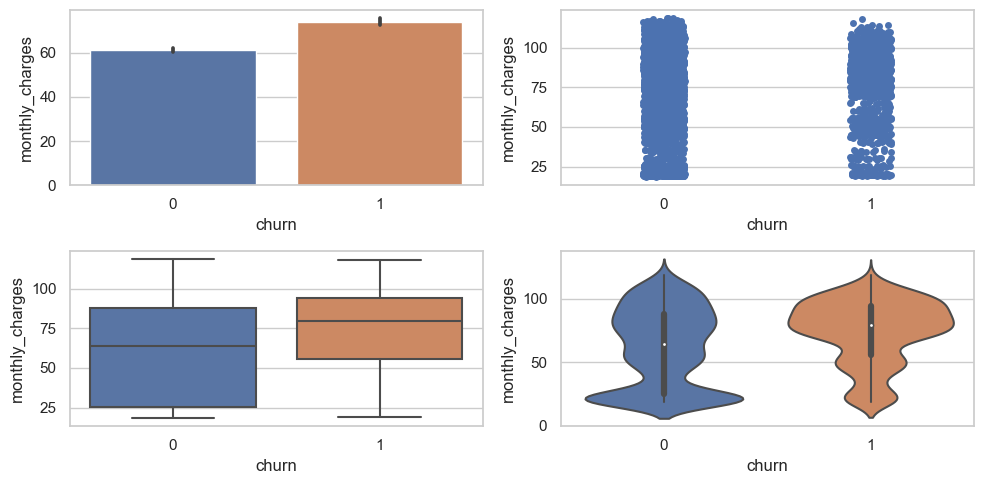

CHURN vs TOTAL_CHARGES
count    4225.000000
mean     2292.584538
std      2268.572655
min        18.800000
25%       412.100000
50%      1402.250000
75%      3804.400000
max      8672.450000
Name: total_charges, dtype: float64


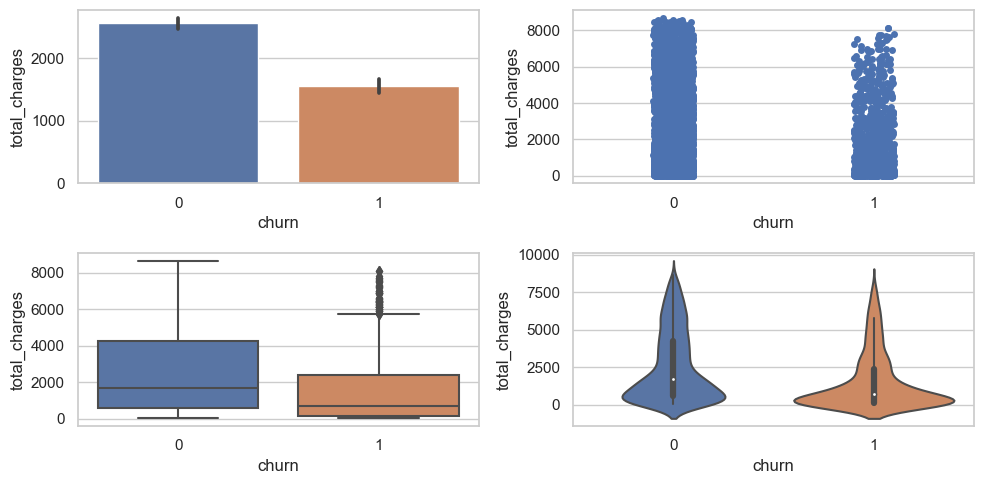

CHURN vs CONTRACT_TYPE
count               4225
unique                 3
top       Month-to-month
freq                2327
Name: contract_type, dtype: object


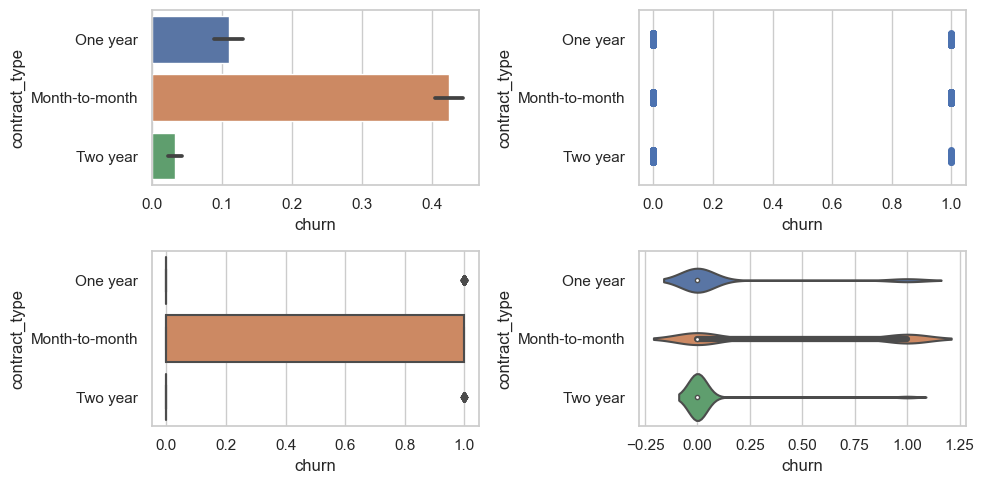

CHURN vs INTERNET_SERVICE_TYPE
count            4225
unique              3
top       Fiber optic
freq             1849
Name: internet_service_type, dtype: object


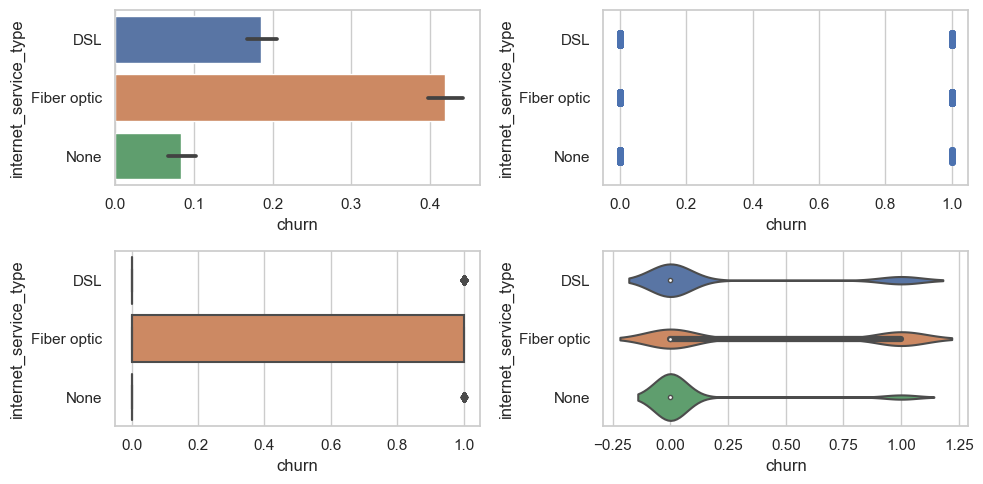

CHURN vs PAYMENT_TYPE
count                 4225
unique                   4
top       Electronic check
freq                  1413
Name: payment_type, dtype: object


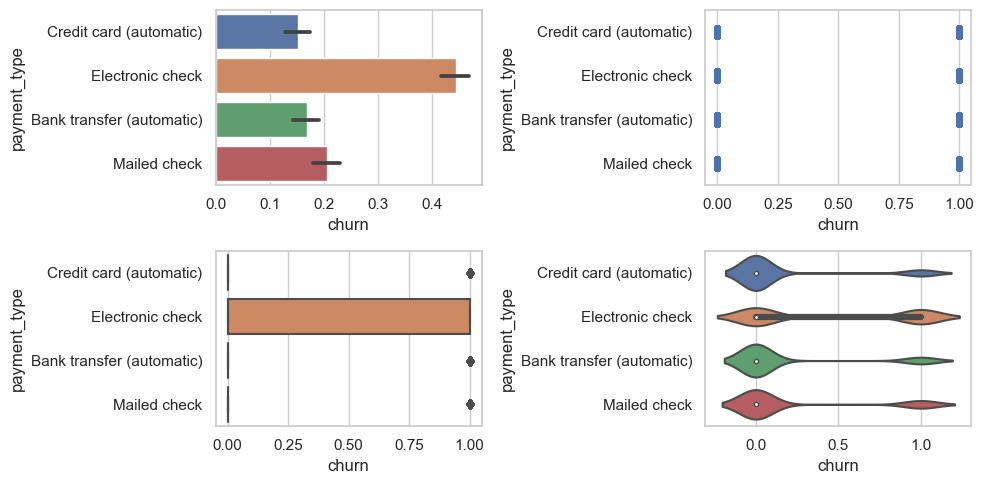

In [9]:
# generate visuals for bivariate statistics
for combo in combinations:
    # descriptive statistics
    print(combo[0].upper(), "vs", combo[1].upper())
    print(train[combo[1]].describe())
    
    # create a subplot object
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
    
    # first visual
    sns.barplot(data=train, x=combo[0], y=combo[1], ax=ax[0,0])
    
    # second visual
    sns.stripplot(data=train, x=combo[0], y=combo[1], ax=ax[0,1])
    
    # third visual
    sns.boxplot(data=train, x=combo[0], y=combo[1], ax=ax[1,0])
    
    # fourth visual
    sns.violinplot(data=train, x=combo[0], y=combo[1], ax=ax[1,1])
    
    plt.tight_layout()
    plt.show()

**Take away**

- `churcn vs monthly charges` it looks like some customers are paying close to 120 dollars while others are only paying about 20 dollars. Can this a couse to whey custers churn. (witch months are more expensive for the custoers?)

- `churn vs internet service` : The majority of customers who churn sims to have fiber optic. customers with DSL sims to have the second charn rate.

- `churn vs contract type` It looks like month to moth  customers are churning at an upresidend rate.

## Multivariate statistics

Here I will visualize the interaction of each measurement type with the others using a pairplot and add color to represent churn.

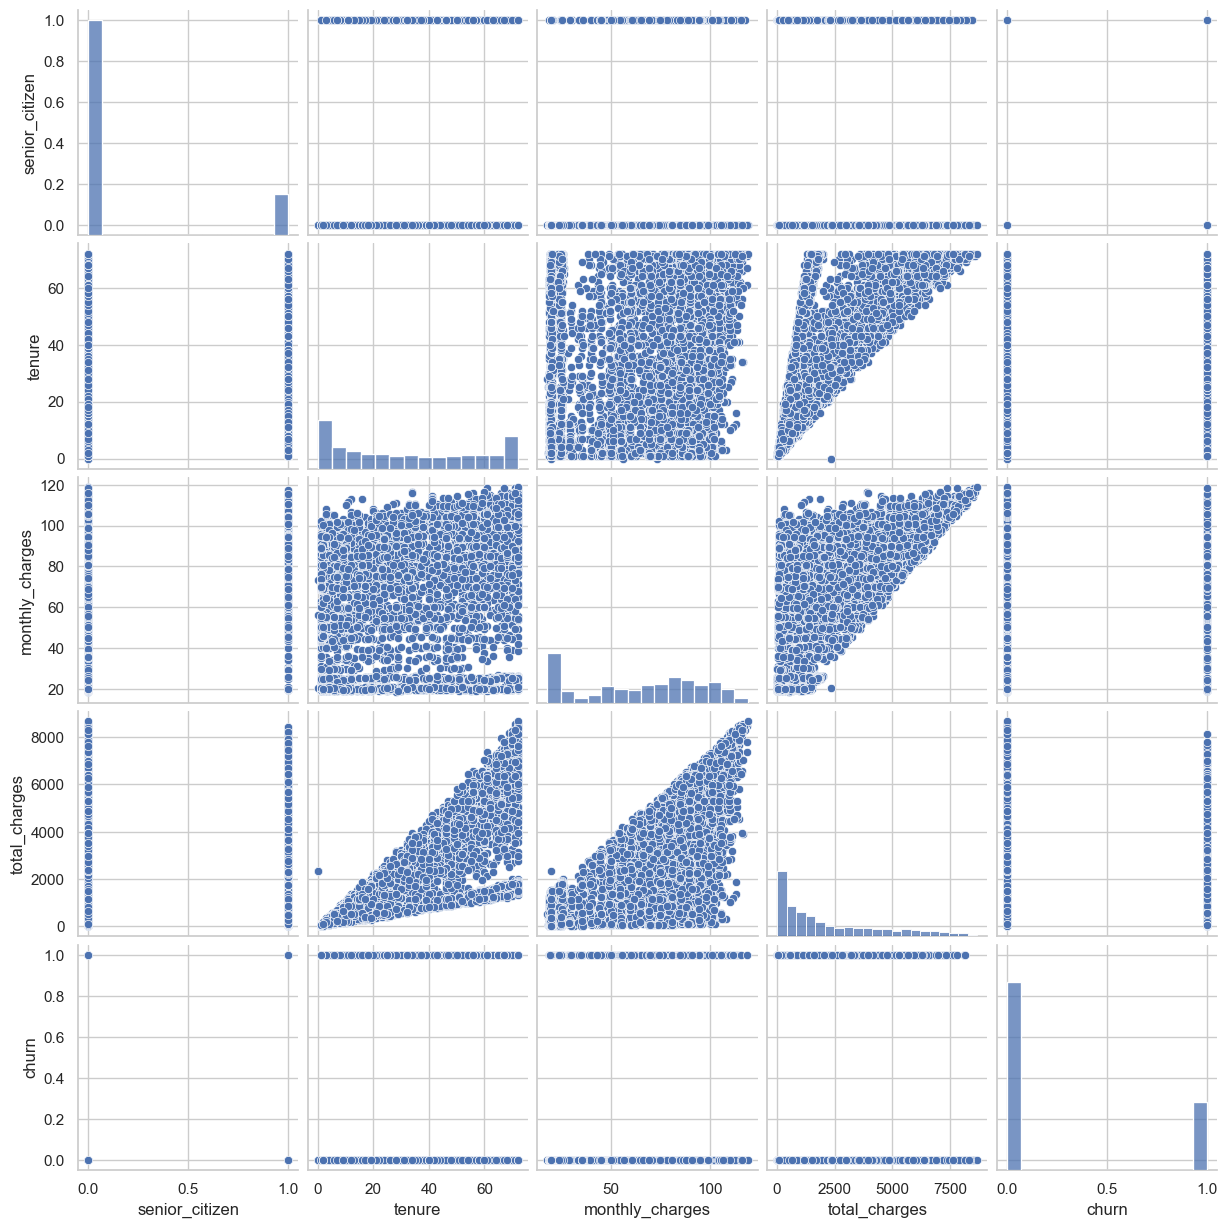

In [10]:
# get a pair plot of all my numeric variable
sns.pairplot(train)

Now I will vusualize my numeric variables of churn with a relplot and a swamplot.

SENIOR_CITIZEN vs TENURE


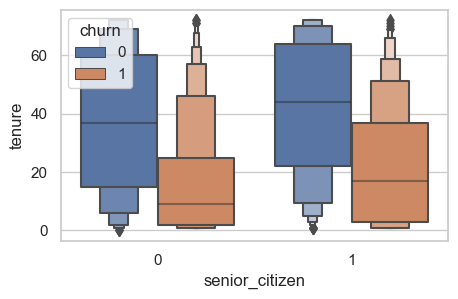

SENIOR_CITIZEN vs MONTHLY_CHARGES


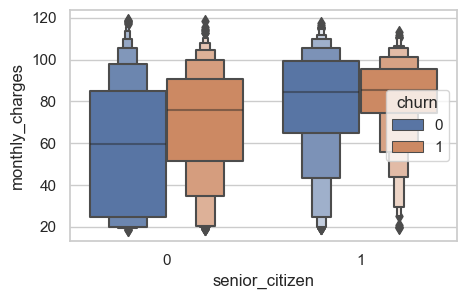

SENIOR_CITIZEN vs TOTAL_CHARGES


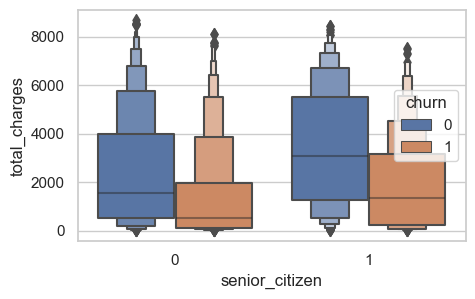

SENIOR_CITIZEN vs CHURN


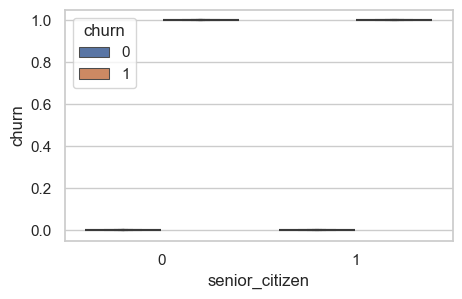

TENURE vs MONTHLY_CHARGES


<Figure size 500x300 with 0 Axes>

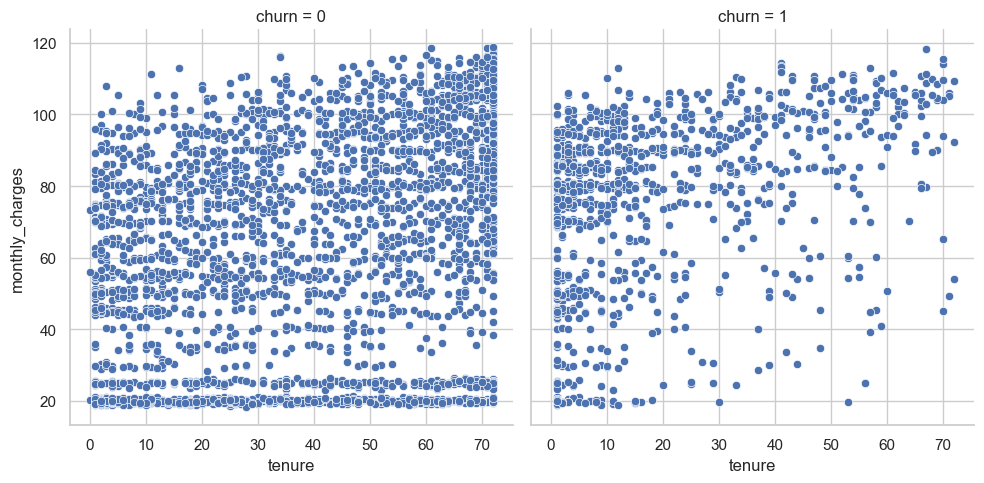

TENURE vs TOTAL_CHARGES


<Figure size 500x300 with 0 Axes>

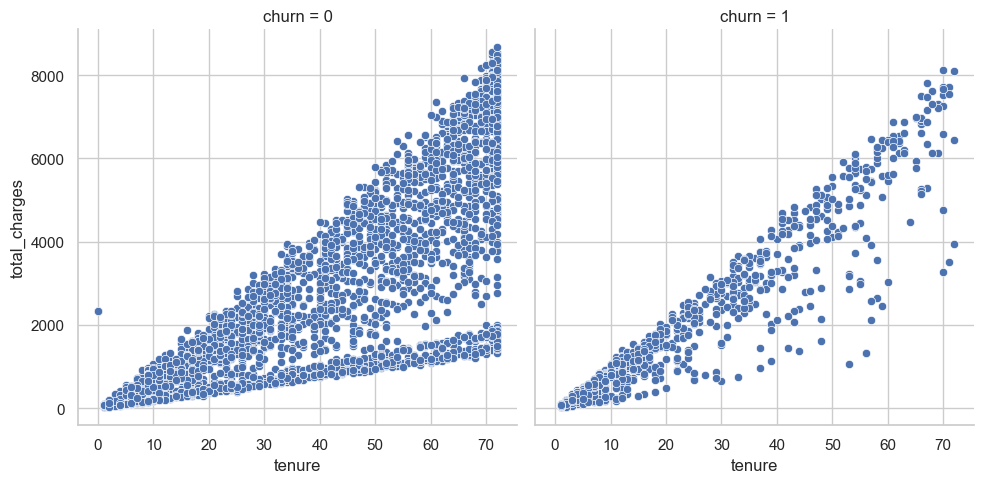

TENURE vs CHURN


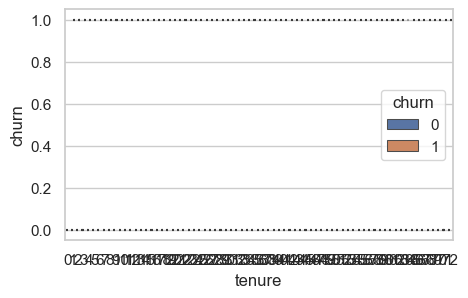

MONTHLY_CHARGES vs TOTAL_CHARGES


<Figure size 500x300 with 0 Axes>

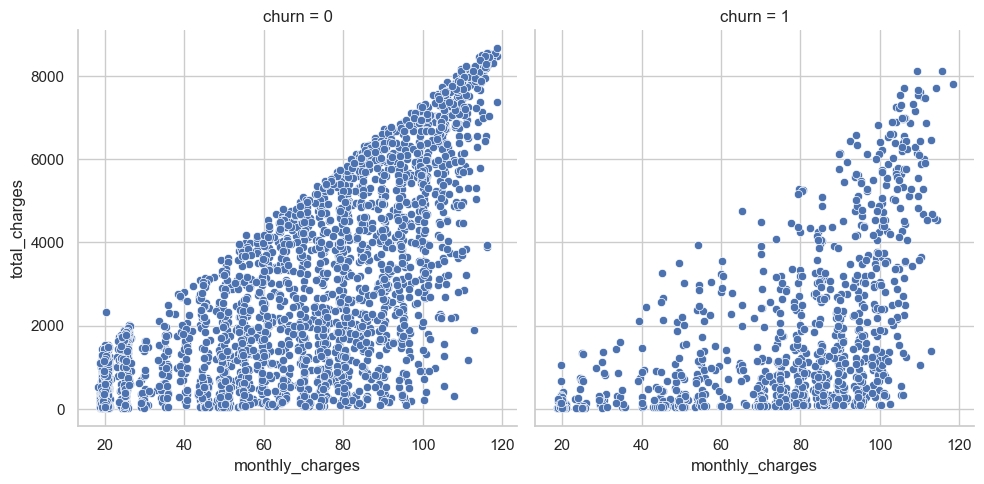

MONTHLY_CHARGES vs CHURN


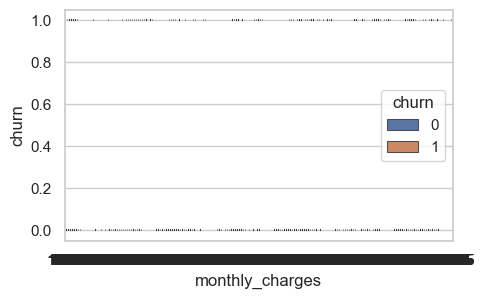

TOTAL_CHARGES vs CHURN


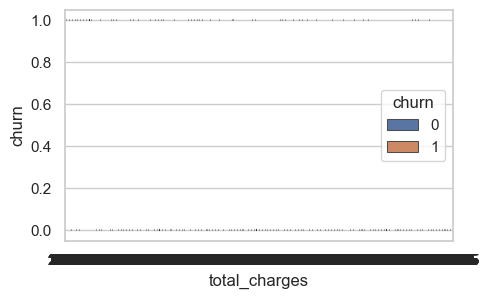

In [11]:
# gather all my numeric columns data
numerics_data = train.select_dtypes("number")

# Silence Seaborn warnings
warnings.filterwarnings("ignore", module="seaborn")

# get the combinations of numeric columns in pairs
combinations = []
combinations.extend(itertools.combinations(numerics_data.columns, 2))

#Note: here I am still using the training data not the melted
target = "churn"
for cols in combinations:
    plt.figure(figsize=(5,3))
    
    # plot continuous vs continuous
    if len(train[cols[0]].value_counts()) > 5 and len(train[cols[1]].value_counts()) > 5:
        print(cols[0].upper(), "vs", cols[1].upper())
        
        sns.relplot(x=train[cols[0]], y=train[cols[1]], col=train[target])
        plt.show()
    else:
        print(cols[0].upper(), "vs", cols[1].upper())

        sns.boxenplot(x=train[cols[0]], y=train[cols[1]], hue=train[target])
        plt.show()


Here I am doing a melp of all my numeric columns to tranform my data from a wide to a long format, and separating the total charnges column to beacause it hase more weight.

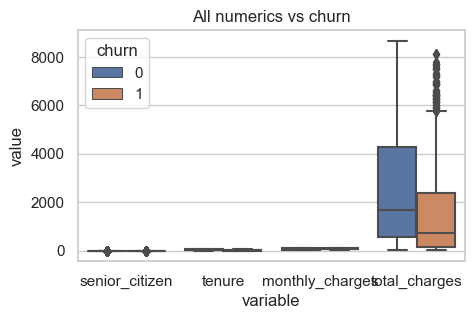

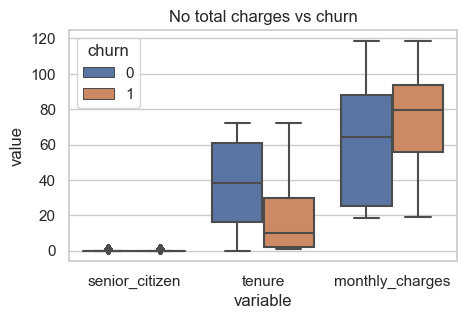

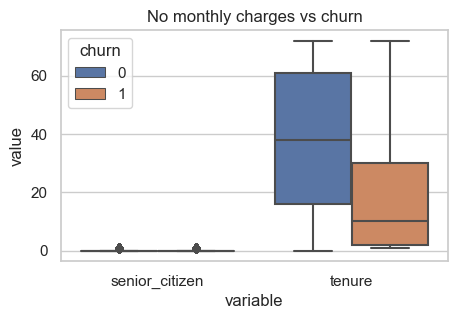

In [12]:
# gather all my numeric columns data
columns = train.select_dtypes("number").columns

plt.figure(figsize=(5,3))
# First plot with all categories
# melt the data from a wide format to long
melted_numerics = train[columns].melt(id_vars="churn")
sns.boxplot(data= melted_numerics, x="variable", y="value", hue="churn")
plt.title("All numerics vs churn")
plt.show()


# remove total_charges from the data
numerics_no_tCharges = []
for i in columns:
    if i == "total_charges":
        pass
    else:
        numerics_no_tCharges.append(i)

# all but tatal charges
# melt the data from a wide format to long
plt.figure(figsize=(5,3))
melted_numerics = train[numerics_no_tCharges].melt(id_vars="churn")
sns.boxplot(data= melted_numerics, x="variable", y="value", hue="churn")
plt.title("No total charges vs churn")
plt.show()



# remove monthly charges from the data
numerics_no_mCharges = []
for i in columns:
    if i in ["monthly_charges","total_charges"]:
        pass
    else:
        numerics_no_mCharges.append(i)

# all but tatal charges
# melt the data from a wide format to long
plt.figure(figsize=(5,3))
melted_numerics = train[numerics_no_mCharges].melt(id_vars="churn")
sns.boxplot(data= melted_numerics, x="variable", y="value", hue="churn")
plt.title("No monthly charges vs churn")
plt.show()

Lot of sinor citizens are paying lot of money, but there total charnges has a high concetration on the lower costs...(does tenure play a roll in this? is ther a relationship between tenure and montly charges and total charges)

### Explore take awys